Usando o exemplo 499

In [1]:
#instalando bibilioteca pandas
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares

c:\Users\LUIRYS SILVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#importando dataset

df = pd.read_csv("../Tweets.csv")

In [4]:
df.head(50-60)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,3.486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,6.837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0,Bad Flight,7.033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,569589643487928321,positive,1.0,NaN,NaN,American,NaN,DrCaseyJRudkin,NaN,0,@AmericanAir Flight 236 was great. Fantastic c...,"[40.64946781, -73.76624703]",2015-02-22 12:08:48 -0800,East Coast,NaN
14626,569589460226183168,negative,1.0,Late Flight,1.0,American,NaN,cataattack,NaN,0,@AmericanAir Flight 953 NYC-Buenos Aires has b...,NaN,2015-02-22 12:08:04 -0800,"Buenos Aires, Argentina",Buenos Aires
14627,569588816438169600,negative,1.0,Cancelled Flight,1.0,American,NaN,KristinaMeyer7,NaN,0,"@AmericanAir Flight Cancelled Flightled, can't...",NaN,2015-02-22 12:05:30 -0800,NaN,Eastern Time (US & Canada)
14628,569588651925098496,positive,1.0,NaN,NaN,American,NaN,jlhalldc,NaN,0,Thank you. “@AmericanAir: @jlhalldc Customer R...,NaN,2015-02-22 12:04:51 -0800,"Washington, DC",Eastern Time (US & Canada)


In [5]:
df.shape

(14640, 15)

<Axes: xlabel='airline_sentiment', ylabel='count'>

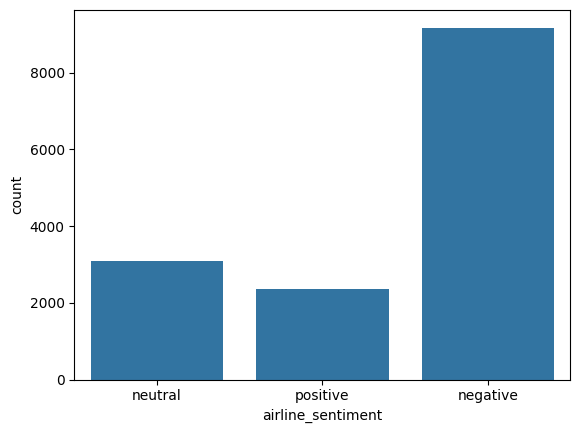

In [6]:
#exibindo os dados em um gráfico de barras
sns.countplot(x='airline_sentiment', data=df)

**Pré-processamento**

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [9]:
df["clean_text"] = df["text"].apply(preprocess_text)

In [10]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,3.486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercial expe...
2,570301083672813571,neutral,6.837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...
3,570301031407624196,negative,1.0,Bad Flight,7.033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing


<Axes: xlabel='airline_sentiment', ylabel='count'>

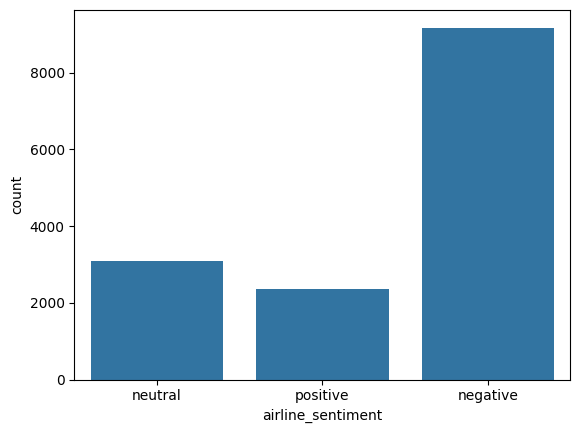

In [11]:
sns.countplot(x="airline_sentiment", data=df) # validando se mudou as classes

TREINAMENTO

In [12]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['text']
y = df['airline_sentiment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["airline_sentiment"], test_size=0.2, random_state=42)

In [14]:
# Import necessary libraries for the pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

# Define and fit the pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to numerical features
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', LinearSVC()),  # Use a LinearSVC classifier (you can change this to another classifier)
])
pipeline.fit(X_train, y_train)  # Train the pipeline on the training data

,steps,"[('vect', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [15]:
#exibindo 5 dados de teste
print(X_test.head(101))

4794     southwestair youre early frontrunner best airl...
10480    usairways flt ewr cancelled flightled yet flts...
8067     jetblue going bdl dca flight yesterday today e...
8880                          jetblue depart washington dc
8292                          jetblue probably find ticket
                               ...                        
14080    americanair trying call day get hung every tim...
5528     southwestair go delayed chicago offer flight n...
5903                                       southwestair th
3013     united haha clean plane held overnight hangar ...
4963     southwestair trying find airfare family price ...
Name: clean_text, Length: 101, dtype: object


**LIME**

In [16]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline.classes_))


def predict_proba(texts):
    # LIME espera probabilidades, mas LinearSVC não tem predict_proba.
    # Usamos decision_function e normalizamos para somar 1 (softmax-like).
    scores = pipeline.decision_function(texts)
    import numpy as np
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")

explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 499
Original text:
americanair narrowly made standbylots snag trip
Real class: negative
Classe predita: negative


In [17]:
# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
americanair: 0.0639
made: -0.0493
snag: -0.0421
trip: -0.0402
narrowly: -0.0271
standbylots: -0.0269


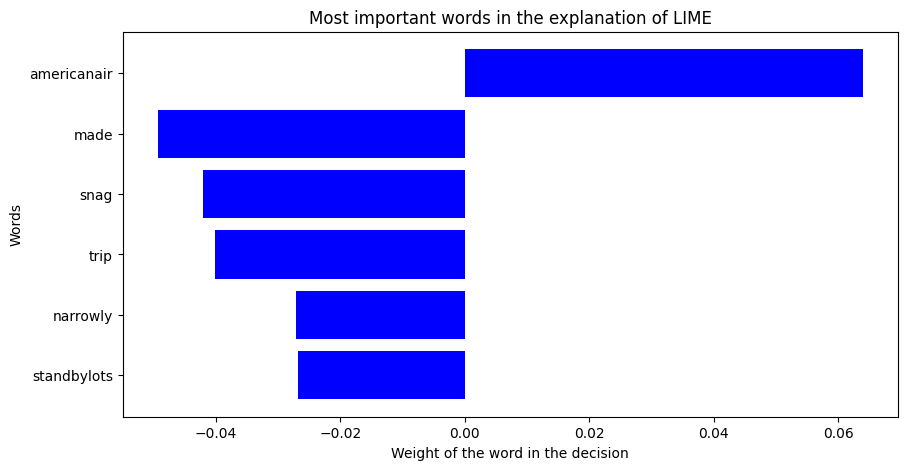

In [18]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [19]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Words", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Words,Impact
0,americanair,0.063904
5,standbylots,-0.026875
4,narrowly,-0.027116
3,trip,-0.040229
2,snag,-0.042124
1,made,-0.049318


**Métricas**

In [20]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.65      0.54      0.59       580
    positive       0.76      0.69      0.73       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.80      0.80      0.80      2928



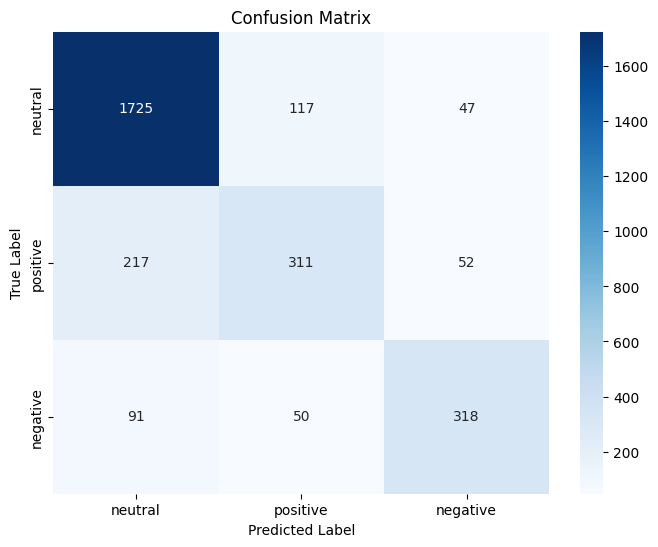

In [21]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["airline_sentiment"].unique(), yticklabels=df["airline_sentiment"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acuraccy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acuraccy: 0.8040
Precision: 0.7958
Recall: 0.8040
F1-Score: 0.7978


**Attention Vizualization**

A interpretação da atenção no SVM é diferente da interpretação em redes neurais. No SVM, a atenção é representada pela importância das features na decisão do modelo.

In [23]:
print(pipeline.classes_)

['negative' 'neutral' 'positive']


Palavras do exemplo e seus pesos na decisão da classe prevista:
           Feature    Weight
7238      narrowly  0.579044
9930   standbylots  0.579044
9717          snag  0.068880
10764         trip  0.038466
6685          made -0.239303
370    americanair -0.916491


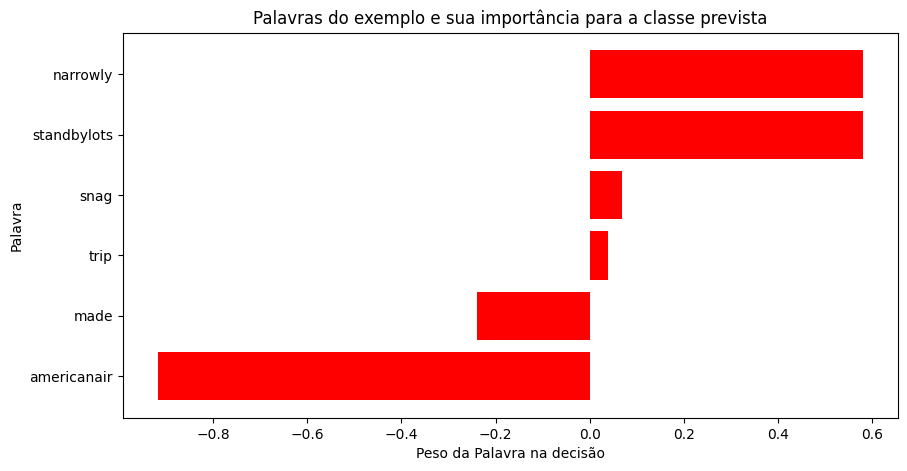

In [24]:
# Obter os nomes das features do CountVectorizer
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Obter os coeficientes do SVM para a classe prevista
classe_prevista = pipeline.predict([sample_text])[0]
classe_idx = list(pipeline.classes_).index(classe_prevista)
pesos = pipeline.named_steps['clf'].coef_[classe_idx]

# Criar DataFrame com as features e pesos
importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})

# Marcar as palavras do exemplo
palavras_exemplo = set(sample_text.split())
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)

# Visualizar as palavras do exemplo e seus pesos
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

# Plotar as palavras do exemplo
plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

Shapley

c:\Users\LUIRYS SILVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


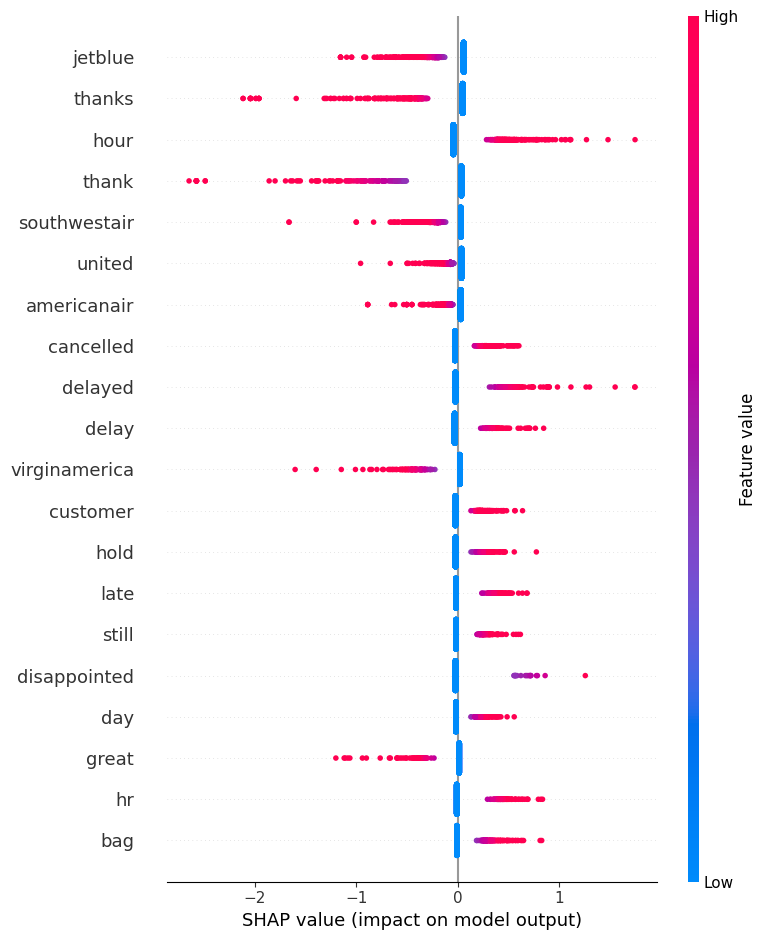

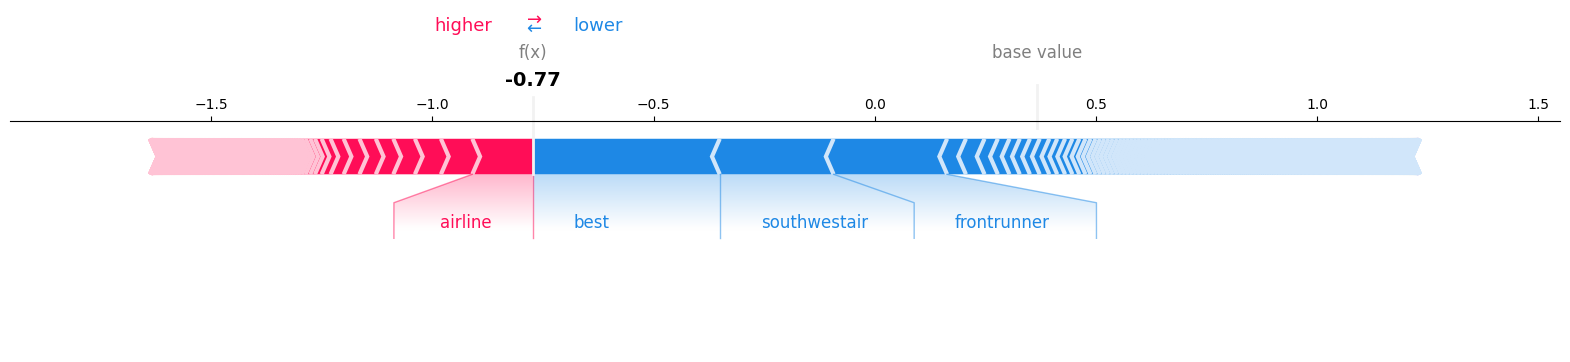

In [25]:
# Transformar os dados usando o pipeline (sem o classificador)
X_train_transformed = pipeline.named_steps['tfidf'].transform(
    pipeline.named_steps['vect'].transform(X_train)
)

X_test_transformed = pipeline.named_steps['tfidf'].transform(
    pipeline.named_steps['vect'].transform(X_test)
)

# Selecionar um subconjunto do treino como background (melhora performance e evita estouro de memória)
background_size = 100
background = X_train_transformed[np.random.choice(X_train_transformed.shape[0], 
                                                  min(background_size, X_train_transformed.shape[0]), 
                                                  replace=False)]

# Criar o explainer para modelo linear
explainer = shap.LinearExplainer(
    pipeline.named_steps['clf'],
    background,
    feature_perturbation="interventional"
)

# Calcular valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test_transformed)

# Obter nomes das features
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

X_test_dense = X_test_transformed.toarray()
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

class_idx = 0  # escolha a classe (0=neg, 1=neu, 2=pos)

# Seleciona a classe no ÚLTIMO eixo
shap_class = shap_values[:, :, class_idx]

# Summary plot
shap.summary_plot(
    shap_class,
    X_test_dense,
    feature_names=feature_names
)

# Force plot de uma instância
idx = 0
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_class[idx],
    feature_names=feature_names,
    matplotlib=True
)


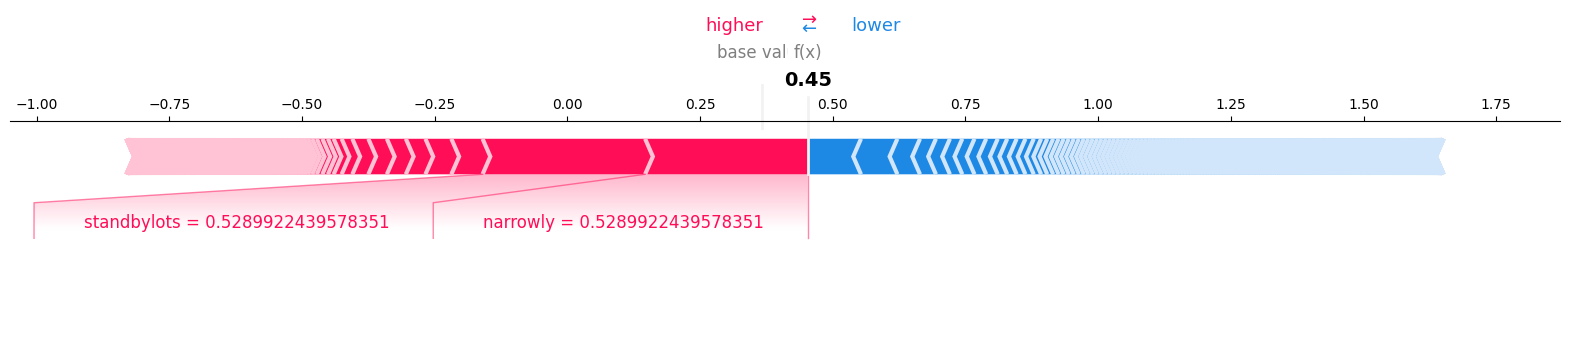

In [26]:
# SHAP para mesma instância usada no LIME

lime_idx = 499
class_idx = 0  # mesma classe analisada no LIME

X_test_dense = X_test_transformed.toarray()

# Seleciona a classe correta
shap_class = shap_values[:, :, class_idx]

# Force plot da mesma instância
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_class[lime_idx],
    X_test_dense[lime_idx],
    feature_names=feature_names,
    matplotlib=True
)
